# Experiments
Presentation of complexities of Brute Force and Dynamic Programming algorithms for different input size and different sets

In [1]:
# pandas and numpy used for help with displaying and manipulating data

import pandas as pd
import numpy as np

In [2]:
# Preparing datasets

from functions.dataset_generation import generate_set

n_sizes = list(range(5, 51, 5))
targets = [int(target ** 1.7) for target in n_sizes]

data_generation_inputs = [(input[0], input[1]) for input in list(zip(n_sizes, targets))]

datasets = []
for data in data_generation_inputs:
    sets = [generate_set(data[0], data[1]) for i in range(5)]
    datasets.append(sets)

# Prepared 5 different datasets for each length of set (n)

datasets_df = pd.DataFrame(datasets)
datasets_df.head()

,0,1,2,3,4
0,"([3, 5, 1, 6, 7], 15)","([4, 2, 0, 0, 2], 15)","([5, 4, 6, 1, 2], 15)","([6, 0, 0, 1, 3], 15)","([7, 7, 5, 5, 3], 15)"
1,"([22, 18, 8, 20, 2, 14, 7, 5, 5, 15], 50)","([8, 7, 7, 19, 9, 23, 14, 0, 12, 1], 50)","([5, 6, 7, 22, 12, 3, 15, 2, 17, 6], 50)","([4, 24, 5, 16, 19, 21, 13, 7, 24, 19], 50)","([2, 18, 16, 8, 8, 12, 23, 20, 17, 4], 50)"
2,"([44, 18, 20, 24, 41, 2, 19, 32, 34, 9, 20, 15...","([11, 33, 24, 30, 17, 12, 40, 28, 35, 31, 2, 1...","([44, 41, 21, 34, 49, 11, 29, 8, 16, 36, 44, 2...","([1, 21, 34, 47, 28, 32, 19, 2, 22, 22, 46, 31...","([8, 34, 27, 32, 3, 47, 14, 18, 47, 48, 48, 39..."
3,"([73, 29, 58, 31, 74, 52, 35, 8, 75, 40, 4, 52...","([6, 61, 47, 70, 46, 49, 56, 27, 28, 56, 21, 4...","([7, 46, 55, 15, 49, 21, 63, 39, 1, 37, 46, 47...","([10, 13, 29, 75, 38, 72, 54, 8, 39, 24, 48, 2...","([4, 73, 78, 57, 32, 15, 51, 78, 63, 27, 17, 7..."
4,"([26, 55, 21, 82, 72, 15, 63, 48, 42, 27, 103,...","([32, 101, 87, 12, 80, 39, 89, 79, 19, 20, 44,...","([97, 118, 108, 23, 19, 96, 88, 47, 56, 105, 2...","([11, 33, 54, 46, 27, 86, 39, 87, 98, 118, 94,...","([10, 87, 115, 68, 73, 67, 77, 15, 64, 23, 112..."


In [3]:
# Running algorithms

from functions.bf import subset_sum_BF
from functions.dp import subset_sum_DP
from functions.decorators import measurements
        
outputs = []
    
for dataset in datasets:
    n_set = []
    for single_set in dataset:
        set = single_set[0]
        target = single_set[1]
        n = len(set)
        bf = measurements(subset_sum_BF)(set=set, target=target, n=len(set))
        dp = measurements(subset_sum_DP)(set=set, target=target)

        output = ((bf[0], bf[1], bf[2]), (dp[0], dp[1], dp[2]))
        n_set.append(output)
    outputs.append(n_set)

# Outputs of algorithms for every dataset
        
outputs_df = pd.DataFrame(outputs)
outputs_df.head()

,0,1,2,3,4
0,"((7.61e-05, 0.003104, (True, 15, [3, 5, 7])), ...","((6.02e-05, 0.001568, (False, 8, [4, 2, 0, 0, ...","((3.98e-05, 0.000416, (True, 15, [5, 4, 6])), ...","((6.1e-05, 0.000808, (False, 10, [6, 0, 0, 1, ...","((4.3e-05, 0.000808, (True, 15, [7, 5, 3])), (..."
1,"((0.000869, 0.004339, (True, 50, [18, 7, 5, 5,...","((0.0007899, 0.00128, (True, 50, [23, 14, 0, 1...","((0.0011393, 0.001722, (True, 50, [7, 3, 15, 2...","((0.0005629, 0.00112, (True, 50, [7, 24, 19]))...","((0.0005382, 0.001248, (True, 50, [2, 16, 8, 2..."
2,"((0.0065701, 0.004632, (True, 99, [9, 15, 35, ...","((0.0042484, 0.001784, (True, 99, [24, 2, 11, ...","((0.0053253, 0.001752, (True, 99, [21, 8, 16, ...","((0.002175, 0.00172, (True, 99, [1, 32, 2, 22,...","((0.0022216, 0.001688, (True, 99, [8, 39, 8, 1..."
3,"((0.0103674, 0.005008, (True, 162, [8, 27, 66,...","((0.0235138, 0.002256, (True, 162, [56, 3, 15,...","((0.0200448, 0.002288, (True, 162, [21, 5, 41,...","((0.074748, 0.00248, (True, 162, [24, 13, 12, ...","((0.007106, 0.00216, (True, 162, [4, 78, 33, 6..."
4,"((0.0722637, 0.00564, (True, 237, [21, 17, 43,...","((0.1059049, 0.002664, (True, 237, [12, 26, 69...","((0.0163415, 0.002632, (True, 237, [19, 88, 47...","((0.0172135, 0.002568, (True, 237, [11, 53, 66...","((0.0365497, 0.002696, (True, 237, [23, 38, 72..."


In [4]:
# Preparing charts

%matplotlib inline

import matplotlib.pyplot as plt

colors = ['r', 'b', 'g', 'm', 'k']
markers = ['o', 'v', '^', '<', '>']
labels = [f'Sets no.{number}' for number in range(1,6)]

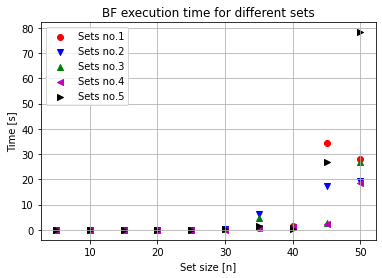

In [5]:
# Brute Force algorithm time complexity (different sets)

bf_time = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[0][0])
    bf_time.append(y)
    
zipped = zip(bf_time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, color=color, marker=marker)
    
plt.title('BF execution time for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

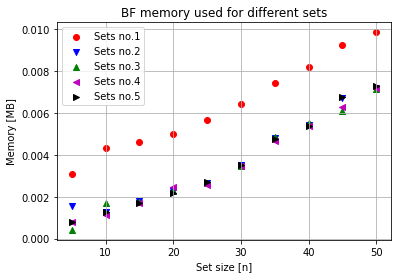

In [6]:
# Brute force algorithm memory complexity (different sets)

bf_memory = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[0][1])
    bf_memory.append(y)
    
zipped = zip(bf_memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('BF memory used for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

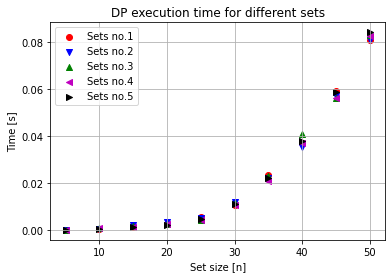

In [7]:
# Dynamic programming algorithm time complexity (different sets)

dp_time = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[1][0])
    dp_time.append(y)
    
zipped = zip(dp_time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('DP execution time for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

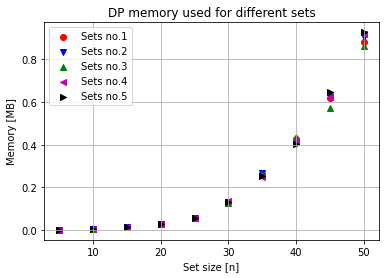

In [8]:
# Dynamic programming algorithm memory complexity (different sets)

dp_memory = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[1][1])
    dp_memory.append(y)
    
zipped = zip(dp_memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('DP memory used for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

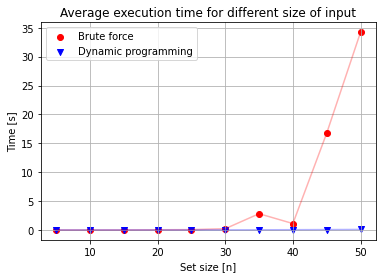

In [9]:
# Time complexity comparison (BF and DP)

bf_time = []
dp_time = []

for index, row in outputs_df.iterrows():
    bf_time_set = [value[0][0] for value in row]
    dp_time_set = [value[1][0] for value in row]
    
    bf_time.append(np.mean(bf_time_set))
    dp_time.append(np.mean(dp_time_set))

time = (bf_time, dp_time)

labels = ('Brute force', 'Dynamic programming')

zipped = zip(time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    plt.plot(n_sizes, asset, c=color, alpha=0.3)
    
plt.title('Average execution time for different size of input')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

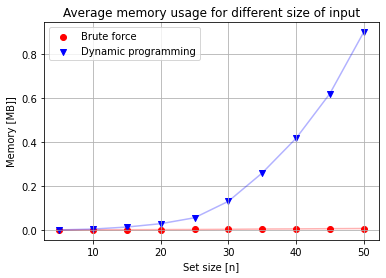

In [10]:
# Memory complexity comparison (BF and DP)

bf_memory = []
dp_memory = []

for index, row in outputs_df.iterrows():
    bf_memory_set = [value[0][1] for value in row]
    dp_memory_set = [value[1][1] for value in row]
    
    bf_memory.append(np.mean(bf_memory_set))
    dp_memory.append(np.mean(dp_memory_set))

memory = (bf_memory, dp_memory)

labels = ('Brute force', 'Dynamic programming')

zipped = zip(memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(n_sizes, asset, label=label, c=color, marker=marker)
    plt.plot(n_sizes, asset, c=color, alpha=0.3)
    
plt.title('Average memory usage for different size of input')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

In [11]:
# Accuracy check

from sklearn.metrics import accuracy_score

bf_scores = []
dp_scores = []

for (index, colname) in enumerate(outputs_df):
    for value in outputs_df[colname].values:
        bf_scores.append(value[0][2][1])
        dp_scores.append(value[1][2][1])

accuracy_score(bf_scores, dp_scores)

1.0